# LOADING THE DATASET


In [1]:
import pandas as pd
import numpy as np
import os
import sklearn
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import keras
from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import Adam
from keras.utils import to_categorical

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/My Drive/CustomerChurn_dataset.csv')

In [4]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# EXPLORATORY DATA ANALYSIS


## Visual analysis


In [5]:
data.shape

(7043, 21)

In [6]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


<ipython-input-8-73e82801352f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


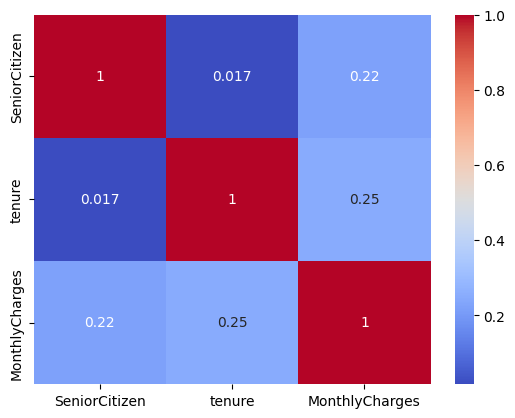

In [8]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

## Data preprocessing


Checking for the categorical values in the dataset

In [9]:
for col in data.columns:
    if data.dtypes[col] == 'object':
        print(col)

customerID
gender
Partner
Dependents
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod
TotalCharges
Churn


In [10]:
categorical_values = [
    "customerID", "gender", "Partner", "Dependents", "PhoneService",
    "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup",
    "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies",
    "Contract", "PaperlessBilling", "PaymentMethod", "TotalCharges", "Churn"
]
categorical_values_2 = [
     "gender", "Partner", "Dependents", "PhoneService",
    "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup",
    "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies",
    "Contract", "PaperlessBilling", "PaymentMethod",
]
categorical_values_df = data[categorical_values]
categorical_values_df.info()
categorical_values_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        7043 non-null   object
 1   gender            7043 non-null   object
 2   Partner           7043 non-null   object
 3   Dependents        7043 non-null   object
 4   PhoneService      7043 non-null   object
 5   MultipleLines     7043 non-null   object
 6   InternetService   7043 non-null   object
 7   OnlineSecurity    7043 non-null   object
 8   OnlineBackup      7043 non-null   object
 9   DeviceProtection  7043 non-null   object
 10  TechSupport       7043 non-null   object
 11  StreamingTV       7043 non-null   object
 12  StreamingMovies   7043 non-null   object
 13  Contract          7043 non-null   object
 14  PaperlessBilling  7043 non-null   object
 15  PaymentMethod     7043 non-null   object
 16  TotalCharges      7043 non-null   object
 17  Churn         

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.5,No
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75,No
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes


In [11]:
new_data = data.drop(categorical_values, axis = 1)
new_data


,SeniorCitizen,tenure,MonthlyCharges
0,0,1,29.85
1,0,34,56.95
2,0,2,53.85
3,0,45,42.30
4,0,2,70.70
...,...,...,...
7038,0,24,84.80
7039,0,72,103.20
7040,0,11,29.60
7041,1,4,74.40


In [12]:
select_columns = ["customerID", "TotalCharges"]
categorical_values_df.drop(select_columns, axis=1, inplace=True)

<ipython-input-12-b4cc7a581038>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_values_df.drop(select_columns, axis=1, inplace=True)


In [13]:
num_totalCharges = pd.to_numeric(data['TotalCharges'], errors='coerce')
num_totalCharges.info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: TotalCharges
Non-Null Count  Dtype  
--------------  -----  
7032 non-null   float64
dtypes: float64(1)
memory usage: 55.1 KB


In [14]:
import numpy as np
from sklearn.impute import SimpleImputer

# Assuming num_totalCharges is a Pandas Series
num_totalCharges_2D = num_totalCharges.values.reshape(-1, 1)

# Create SimpleImputer
imp = SimpleImputer(strategy="most_frequent")

# Fit and transform the data
imputed_data = imp.fit_transform(num_totalCharges_2D)
imputed_data1 = pd.DataFrame(imputed_data)
# encoded_categorical = pd.DataFrame(encoded_categoric)
imputed_data1.rename(columns = {0:'Total Charges'}, inplace = True)
imputed_data1


,Total Charges
0,29.85
1,1889.50
2,108.15
3,1840.75
4,151.65
...,...
7038,1990.50
7039,7362.90
7040,346.45
7041,306.60


In [15]:
categorical_values_df

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No
7039,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No
7040,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
7041,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


### Encoding

In [16]:

le = LabelEncoder()

for column in categorical_values_df.columns:
    if categorical_values_df[column].dtype == 'object':
        categorical_values_df[column] = le.fit_transform(categorical_values_df[column])

categorical_values_df


<ipython-input-16-6816f6b07ff8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_values_df[column] = le.fit_transform(categorical_values_df[column])
<ipython-input-16-6816f6b07ff8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_values_df[column] = le.fit_transform(categorical_values_df[column])
<ipython-input-16-6816f6b07ff8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,1,2,0,2,0,2,2,2,2,1,1,3,0
7039,0,1,1,1,2,1,0,2,2,0,2,2,1,1,1,0
7040,0,1,1,0,1,0,2,0,0,0,0,0,0,1,2,0
7041,1,1,0,1,2,1,0,0,0,0,0,0,0,1,3,1


In [17]:
# encoded_categoric = pd.get_dummies(categorical_values_2)
# encoded_categorical = pd.DataFrame(encoded_categoric)
# encoded_categorical

In [18]:
concatenated_df = new_data.join([categorical_values_df, imputed_data1])
concatenated_df


,SeniorCitizen,tenure,MonthlyCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,Total Charges
0,0,1,29.85,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0,29.85
1,0,34,56.95,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0,1889.50
2,0,2,53.85,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1,108.15
3,0,45,42.30,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0,1840.75
4,0,2,70.70,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1,1,1,1,2,0,2,0,2,2,2,2,1,1,3,0,1990.50
7039,0,72,103.20,0,1,1,1,2,1,0,2,2,0,2,2,1,1,1,0,7362.90
7040,0,11,29.60,0,1,1,0,1,0,2,0,0,0,0,0,0,1,2,0,346.45
7041,1,4,74.40,1,1,0,1,2,1,0,0,0,0,0,0,0,1,3,1,306.60


scaling the data

## FEATURE ENGINEERING


In [19]:
y = concatenated_df['Churn']
X = concatenated_df.drop('Churn', axis=1)

In [20]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)
X_scaled = pd.DataFrame(scaled_data, columns=X.columns)
X_scaled

,SeniorCitizen,tenure,MonthlyCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Total Charges
0,-0.439916,-1.277445,-1.160323,-1.009559,1.034530,-0.654012,-3.054010,0.062723,-1.183234,-0.918838,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-0.992638
1,-0.439916,0.066327,-0.259629,0.990532,-0.966622,-0.654012,0.327438,-0.991588,-1.183234,1.407321,-1.029919,1.245111,-0.925262,-1.113495,-1.121405,0.371271,-1.205113,1.334863,-0.172181
2,-0.439916,-1.236724,-0.362660,0.990532,-0.966622,-0.654012,0.327438,-0.991588,-1.183234,1.407321,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,-0.958093
3,-0.439916,0.514251,-0.746535,0.990532,-0.966622,-0.654012,-3.054010,0.062723,-1.183234,1.407321,-1.029919,1.245111,1.396299,-1.113495,-1.121405,0.371271,-1.205113,-1.474052,-0.193689
4,-0.439916,-1.236724,0.197365,-1.009559,-0.966622,-0.654012,0.327438,-0.991588,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-0.938901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,-0.439916,-0.340876,0.665992,0.990532,1.034530,1.529024,0.327438,1.117034,-1.183234,1.407321,-1.029919,1.245111,1.396299,1.146547,1.138411,0.371271,0.829798,1.334863,-0.127621
7039,-0.439916,1.613701,1.277533,-1.009559,1.034530,1.529024,0.327438,1.117034,0.172250,-0.918838,1.242550,1.245111,-0.925262,1.146547,1.138411,0.371271,0.829798,-0.537747,2.242623
7040,-0.439916,-0.870241,-1.168632,-1.009559,1.034530,1.529024,-3.054010,0.062723,-1.183234,1.407321,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-0.852958
7041,2.273159,-1.155283,0.320338,0.990532,1.034530,-0.654012,0.327438,1.117034,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,-0.870539


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Training a model for feature importance to find the most important features necessary for training the model.


In [22]:
rf_model = RandomForestClassifier()

rf_model.fit(X_scaled, y)

feature_importances = rf_model.feature_importances_

total_importance = sum(feature_importances)

feature_importances_percentage = (feature_importances / total_importance) * 100
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances_percentage})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print feature importances
for i in range(X.shape[1]):
    print(f"{i + 1} {feature_importance_df['Feature'].iloc[i]} ({feature_importance_df['Importance'].iloc[i]:.2f}%)")



1 Total Charges (18.90%)
2 MonthlyCharges (17.98%)
3 tenure (16.16%)
4 Contract (8.30%)
5 PaymentMethod (5.11%)
6 OnlineSecurity (4.43%)
7 TechSupport (3.52%)
8 gender (2.83%)
9 OnlineBackup (2.81%)
10 DeviceProtection (2.60%)
11 PaperlessBilling (2.50%)
12 InternetService (2.46%)
13 Partner (2.36%)
14 MultipleLines (2.15%)
15 SeniorCitizen (2.06%)
16 Dependents (1.95%)
17 StreamingMovies (1.75%)
18 StreamingTV (1.65%)
19 PhoneService (0.49%)


In [23]:
top_n = 15
top_features = feature_importance_df.head(top_n)['Feature']

# Print the top features
for i, feature in enumerate(top_features):
    print(f"{i + 1} {feature} ({feature_importance_df.loc[feature_importance_df['Feature'] == feature, 'Importance'].values[0]:.2f}%)")

final_var = X_scaled[top_features]





1 Total Charges (18.90%)
2 MonthlyCharges (17.98%)
3 tenure (16.16%)
4 Contract (8.30%)
5 PaymentMethod (5.11%)
6 OnlineSecurity (4.43%)
7 TechSupport (3.52%)
8 gender (2.83%)
9 OnlineBackup (2.81%)
10 DeviceProtection (2.60%)
11 PaperlessBilling (2.50%)
12 InternetService (2.46%)
13 Partner (2.36%)
14 MultipleLines (2.15%)
15 SeniorCitizen (2.06%)


# MODEL TRAINING


Here we split data into the input and the output

In [24]:
X = final_var
y = concatenated_df['Churn']


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# input_layer = Input(shape=(X_train.shape[1],))
# hidden_layer_1 = Dense(32, activation='relu')(input_layer)
# hidden_layer_2 = Dense(24, activation='relu')(hidden_layer_1)
# hidden_layer_3 = Dense(12, activation='relu')(hidden_layer_2)
# output_layer = Dense(1, activation='sigmoid')(hidden_layer_3)

# model = Model(inputs=input_layer, outputs=output_layer)

In [27]:
# model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# model.fit(X_train, y_train, epochs=1000, batch_size=32, validation_data=(X_test, y_test))

In [28]:
pip install scikeras


## Multi-Layer Perceptron model using the Functional API with cross validation and grid search

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


def create_model():
    input_layer = Input(shape=(X_train.shape[1],))
    hidden_layer_1 = Dense(32, activation='relu')(input_layer)
    hidden_layer_2 = Dense(24, activation='relu')(hidden_layer_1)
    hidden_layer_3 = Dense(12, activation='relu')(hidden_layer_2)
    output_layer = Dense(1, activation='sigmoid')(hidden_layer_3)

    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

    model.fit(X_train, y_train, epochs=1000, batch_size=32, validation_data=(X_test, y_test))
    return model

keras_model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=32, verbose=0)

param_grid = {
    'epochs': [50, 200, 350],
    'batch_size': [16, 32, 64]
}

grid_search = GridSearchCV(estimator=keras_model, param_grid=param_grid, cv=StratifiedKFold(n_splits=5), scoring='accuracy', n_jobs=-1)

grid_result = grid_search.fit(X_train, y_train)

print("Best Hyperparameters:")
print(grid_result.best_params_)



In [ ]:
# Get the best model
best_keras_model = grid_result.best_estimator_

# Evaluate the model on the test set
accuracy = best_keras_model.score(X_test, y_test)
print(f"Accuracy on the test set: {accuracy:.4f}")


In [ ]:
# # Get the best hyperparameters from grid search results
# best_params = grid_result.best_params_

# # Define a function to create the model based on the best parameters
# def create_best_model():
#     model = Sequential()
#     model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
#     model.add(Dense(24, activation='relu'))
#     model.add(Dense(12, activation='relu'))
#     model.add(Dense(1, activation='sigmoid'))
#     model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#     return model

# # Create the best model using the defined function and best hyperparameters
# best_keras_model1 = KerasClassifier(build_fn=create_best_model, epochs=best_params['epochs'], batch_size=best_params['batch_size'], verbose=0)

# # Train the model with the best hyperparameters
# best_keras_model1.fit(X_train, y_train)

# # Save the best model
# model_path = '/content/drive/My Drive/best_keras_model.pkl'
# with open(model_path, 'wb') as file:
#     pickle.dump(best_keras_model, file)

# # Save the scaler
# scaler_path = '/content/drive/My Drive/scaler.pkl'
# with open(scaler_path, 'wb') as file:
#     pickle.dump(scaler, file)


# MODEL TESTING, EVALUATION AND OPTIMIZATION

> Indented block



## Model Accuracy Evaluation

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = best_keras_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set: {accuracy:.4f}")

Accuracy on the test set: 0.8112


## AUC Score

In [ ]:
from sklearn.metrics import roc_auc_score

y_pred_proba = best_keras_model.predict_proba(X_test)
positive_class_proba = y_pred_proba[:, 1]

auc = roc_auc_score(y_test, positive_class_proba)
print(f"AUC on the test set: {auc:.4f}")


AUC on the test set: 0.8418


# MODEL, SCALER AND ENCODER SAVING FOR DEPLOYMENT

In [ ]:

import pickle

file_path = '/content/drive/My Drive/model3.pkl'

with open(file_path, 'wb') as file:
    pickle.dump(best_keras_model, file)

In [ ]:
file_path = '/content/drive/My Drive/model3.pkl'

with open(file_path, 'wb') as file:
    pickle.dump(best_keras_model, file)

In [ ]:
file_path = '/content/drive/My Drive/scaler3.pkl'

with open(file_path, 'wb') as file:
    pickle.dump(scaler, file)

In [ ]:
file_path = '/content/drive/My Drive/label3.pkl'

with open(file_path, 'wb') as file:
    pickle.dump(le, file)

In [ ]:
# # ...

# # Get the best hyperparameters
# best_params = grid_result.best_params_

# # Rebuild the model with the best hyperparameters
# best_keras_model = KerasClassifier(build_fn=create_model, verbose=0, **best_params)

# # Fit the best model to the training data
# best_keras_model.fit(X_train, y_train)

# # Evaluate the model on the test set
# loss, accuracy = best_keras_model.model.evaluate(X_test, y_test)
# print(f'Test Loss: {loss:.4f}')
# print(f'Test Accuracy: {accuracy*100:.4f}')






In [ ]:
model = best_keras_model1.build_fn()

In [ ]:
model.save('/content/drive/My Drive/model4.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
save_model(model, 'model4.h5')

<ipython-input-47-b136e02a8f79>:1: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model, 'model4.h5')
